# Skaters (Season 2024/25) - Goals

### Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from utils import data_cleaning
from utils import distribution_analysis as da
from utils import discrete_distribution_models as ddm
from utils import correlation_analysis
from utils import hypothesis_testing
from utils import regression_analysis

### Import the dataset

In [4]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


### Read the data

In [5]:
data_cleaning.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
data_cleaning.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


### Data cleaning

In [8]:
# Missing values?
data_cleaning.report_nan(df)

No missing values found.


In [9]:
df = data_cleaning.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = data_cleaning.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


## Part 01 - Goals

### Variables and Filter

In [10]:
feature="I_F_goals"
situation = "all"
min_games_played = 20
name_player="Auston Matthews"

To focus on meaningful performance, this chart includes only skaters who played a minimum number of games.

In [11]:
df_goals = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]

### Summary Statistics

In [12]:
answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Top goal scorer: {answer["name"]} with {int(answer[feature])} goals.")

answer = df[df["situation"] == "5on4"].loc[lambda d: d['I_F_goals'].idxmax()]
print(f"Top goal scorer in 5-on-4 situations: {answer["name"]} with {int(answer[feature])} goals.")

answer = df[df["situation"] == "4on5"].loc[lambda d: d['I_F_goals'].idxmax()]
print(f"Top goal scorer in 4-on-5 situations: {answer["name"]} with {int(answer[feature])} goals.")

Top goal scorer: Leon Draisaitl with 52 goals.
Top goal scorer in 5-on-4 situations: Jake Guentzel with 15 goals.
Top goal scorer in 4-on-5 situations: Alex Tuch with 6 goals.


### Frequency Tables

Mean: 11.192
Variance: 99.171
Standard deviation: 9.951
Mode: 4.0


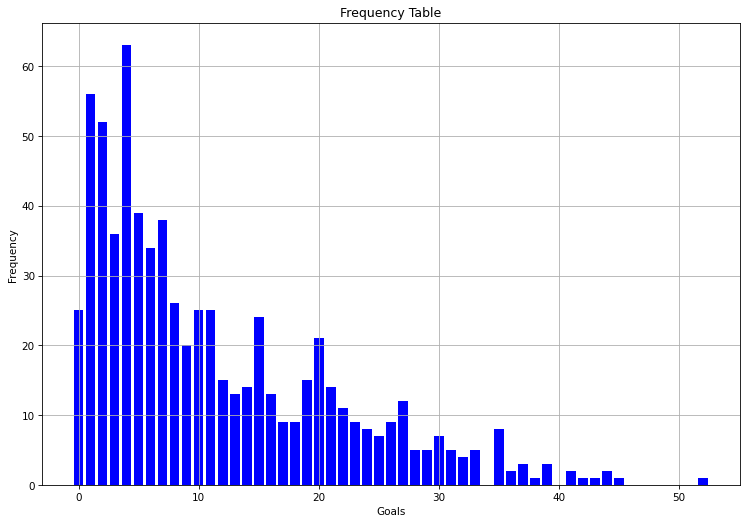

In [13]:
da.plot_ftab(df_goals, feature, xlabel="Goals")

Cohen's effect size: 1.15


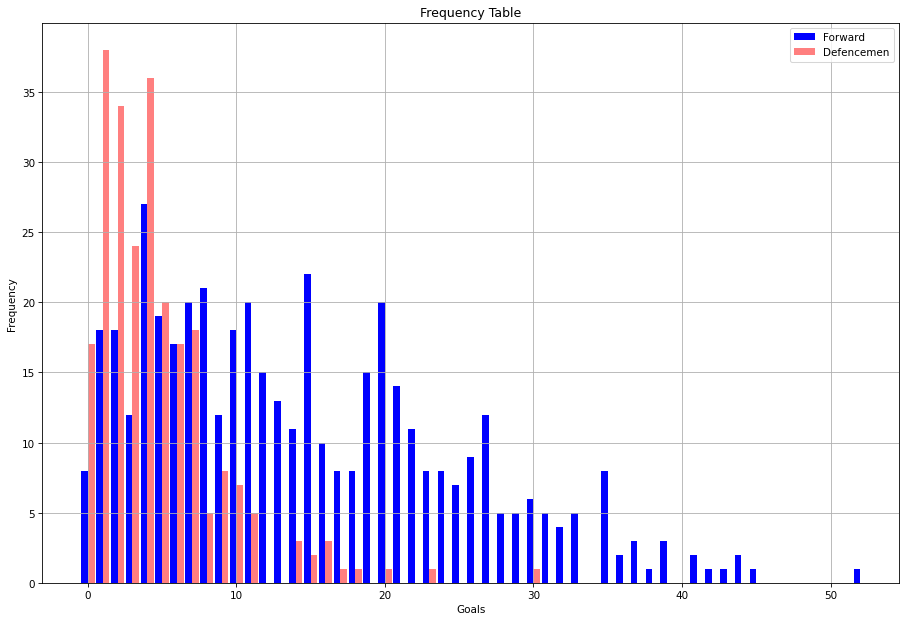

In [14]:
df1 = df_goals[df_goals["position"]!="D"]
df2 = df_goals[df_goals["position"]=="D"]

da.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Goals")

### Probability Mass Function

Actual PMF: 
Mean: 11.192
Variance: 99.03
Standard deviation: 9.951
Mode: 4.0
Skewness: 1.131

Observed PMF: 
Mean: 20.040
Variance: 120.32
Standard deviation: 10.969
Mode: 20.0
Skewness: 0.366


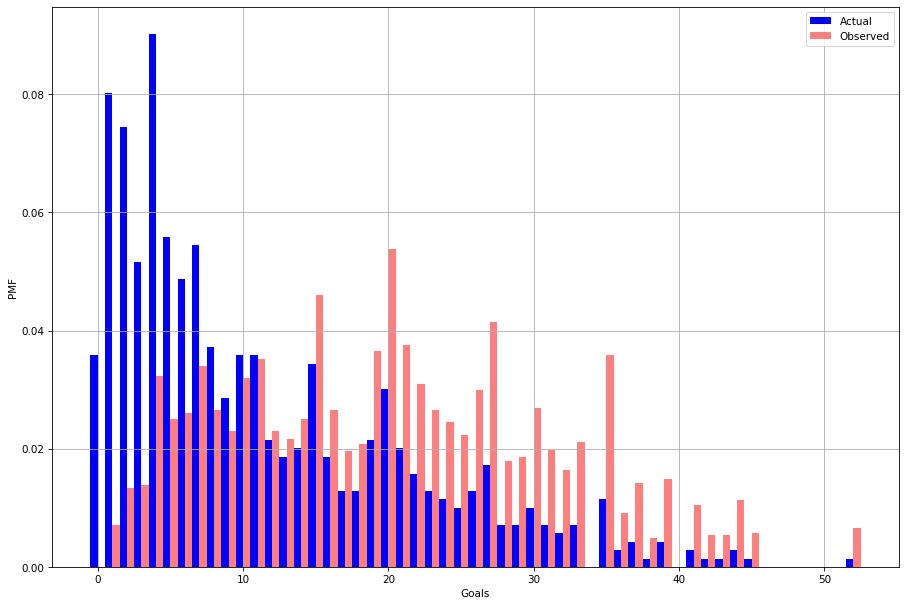

In [15]:
da.plot_pmf(df_goals, feature, xlabel="Goals", width=0.5)

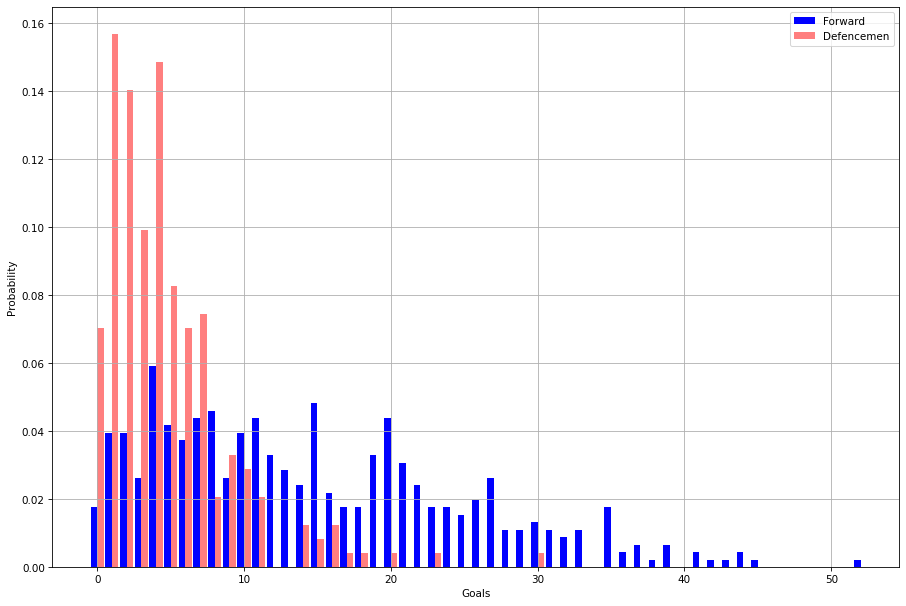

In [16]:
df1 = df_goals[df_goals["position"]!="D"]
df2 = df_goals[df_goals["position"]=="D"]

da.plot_two_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Goals")

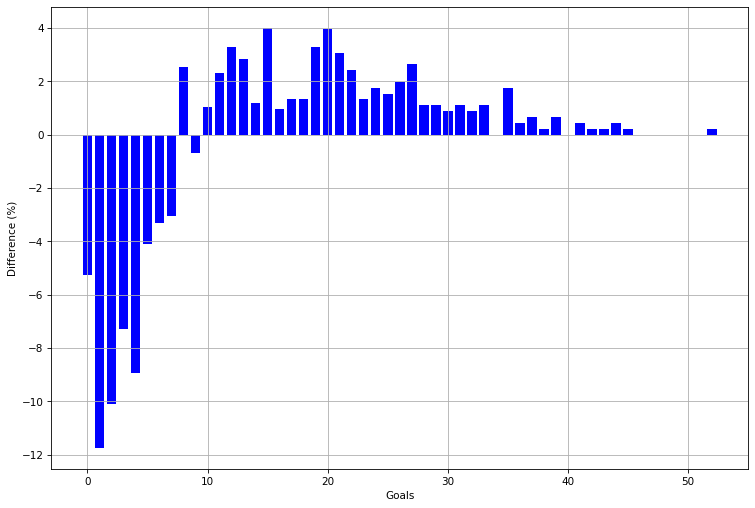

In [17]:
df1 = df_goals[df_goals["position"]!="D"]
df2 = df_goals[df_goals["position"]=="D"]

da.plot_diff_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Goals")

### Cumulative Distribution Function

Auston Matthews - Percentile rank: 96.42
Median: 8.00
Interquartile range: 13.00
Quartile skewness: 0.38


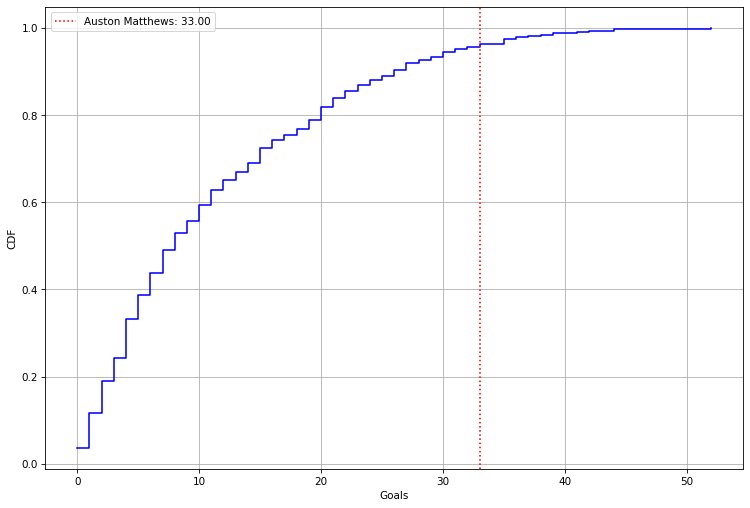

In [18]:
vals = df_goals[feature].values
ref = df_goals[df_goals["name"]==name_player][feature].values[0]

da.print_percentile_rank(ref, vals, label=name_player)
da.plot_cdf(ref, vals, label=name_player, xlabel="Goals")

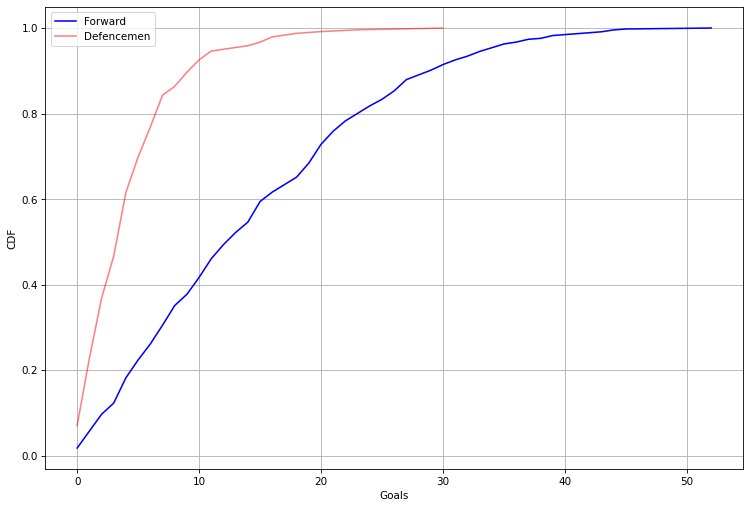

In [19]:
vals1 = df_goals[df_goals["position"]!="D"][feature].values
vals2 = df_goals[df_goals["position"]=="D"][feature].values

da.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Goals")

### Modeling Distributions

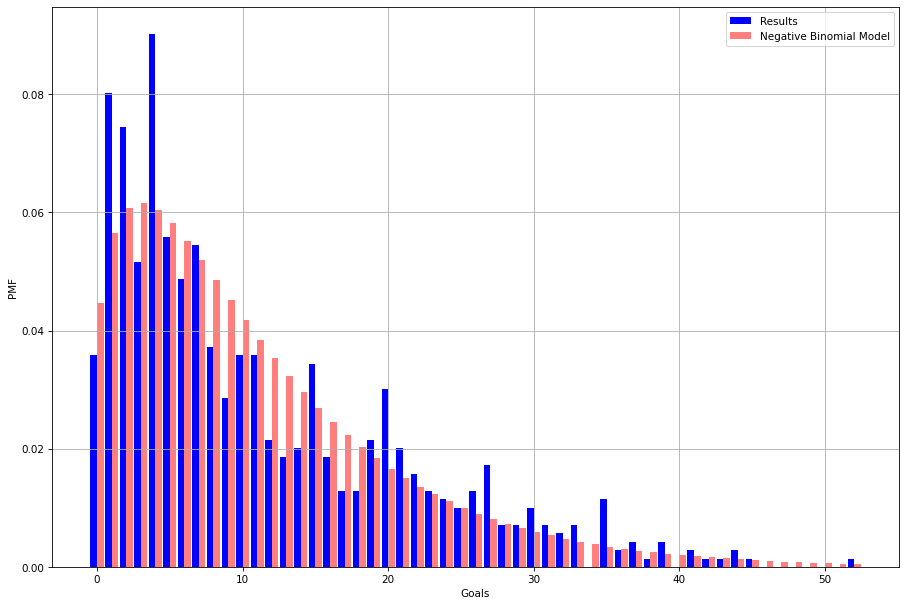

In [20]:
top_score = int(df_goals[feature].max())

mean, var, r = ddm.plot_empirical_vs_nb_model(df_goals, feature, range(top_score+1), xlabel="Goals")

### Estimation

Mean Squared Error (Mean): 0.0008
Mean Absolute Error (Mean): 0.0156
Mean Squared Error (Median): 0.0157
Mean Absolute Error (Median): 0.0636


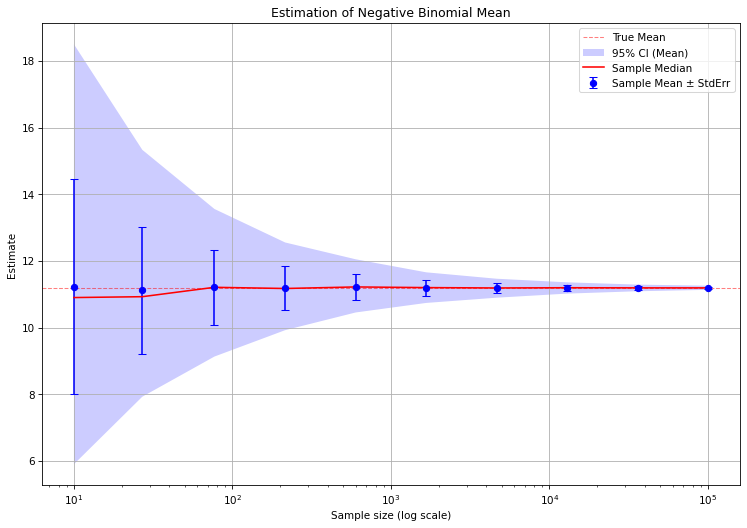

In [21]:
ddm.simulate_mean_estimation_nb(mean, r)

## Part 02 - Relationships between 2 variables

### Variables and Filter

In [22]:
feature1="I_F_xGoals"
feature2="I_F_goals"
situation = "all"
min_games_played = 20
label1 = "Expected goals"
label2= "Goals"

In [23]:
df_goals = df[(df["situation"]==situation) & (df["games_played"]>=min_games_played)]
df1 = df_goals[feature1]
df2 = df_goals[feature2]

### Scatter plot

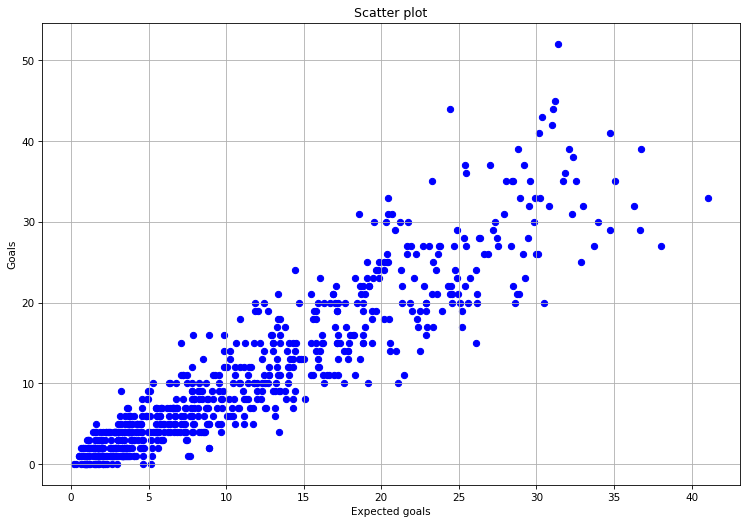

In [24]:
correlation_analysis.plot_scatter(df1, df2, xlabel=label1, ylabel=label2)

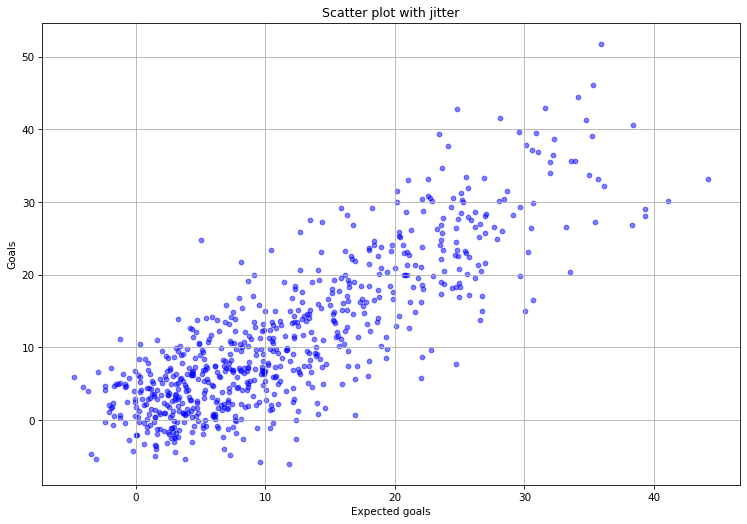

In [25]:
correlation_analysis.plot_scatter_with_jitter(df1, df2, xlabel=label1, ylabel=label2, alpha=0.5)

### Decile plot

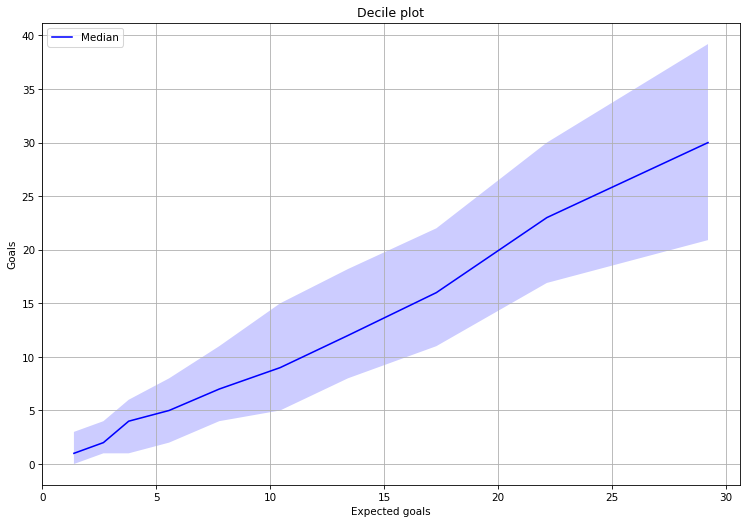

In [26]:
correlation_analysis.plot_decile(df_goals, feature1, feature2, xlabel=label1, ylabel=label2)

### Standardization and Pearson Correlation Coefficient 

Pearson correlation coefficient: 0.921


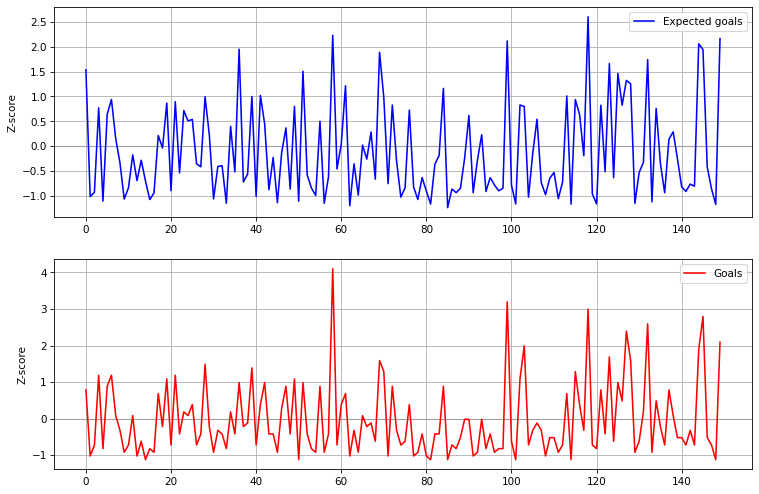

In [27]:
correlation_analysis.plot_zscore_and_corr(df1, df2, 
                                          end_sample=150, 
                                          label1=label1, 
                                          label2=label2)

### Rank Correlation and Spearman's Rank Correlation Coefficient

Spearman's rank correlation coefficient: 0.930


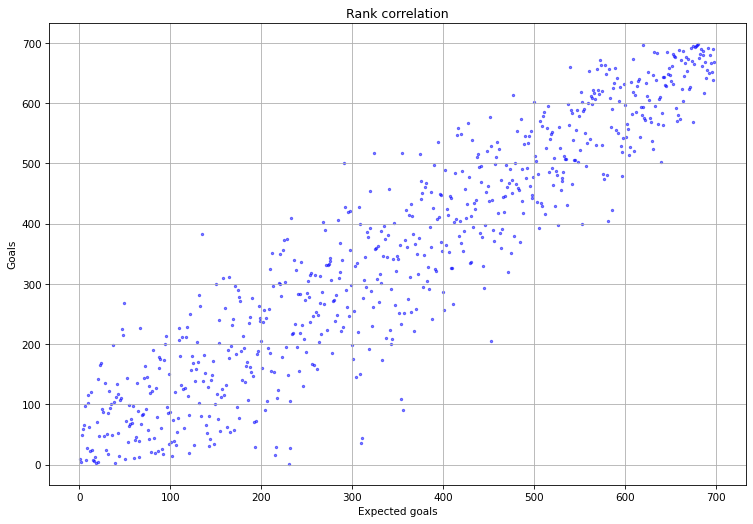

In [28]:
correlation_analysis.plot_rank_correlation(df1, df2, xlabel=label1, ylabel=label2)

### Hypothesis Testing

**Null Hypothesis**: There is no significant difference in goals scored between players with high and low expected goals.

**Alternative Hypothesis**: Players with higher expected goals score significantly more goals.

In [29]:
group1 = df_goals[df2 < df2.quantile(0.75)][feature1].values
group2 = df_goals[df2 >= df2.quantile(0.75)][feature1].values

Statistic: 16.336300943800943
p-value: 1.999980000199998e-05


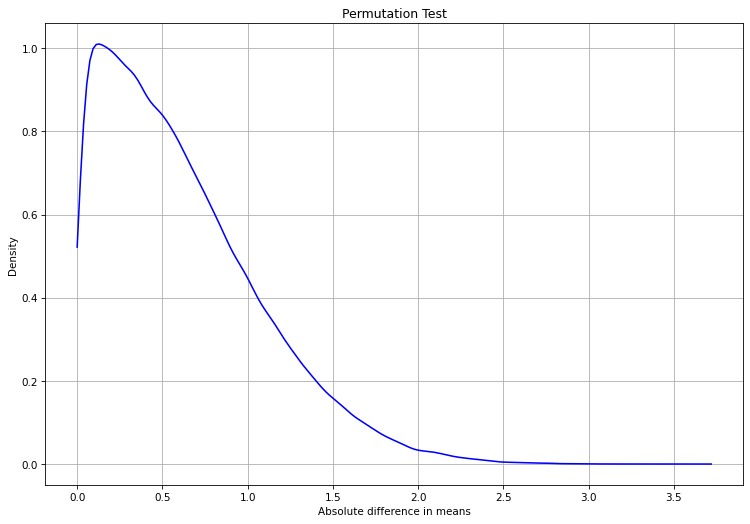

In [30]:
res = hypothesis_testing.permutation_diff_means(group1, group2)

print(f"Statistic: {res.statistic}")
print(f"p-value: {res.pvalue}")

hypothesis_testing.plot_permutation_test(res.null_distribution, res.statistic, xlabel="Absolute difference in means")

I conducted a permutation test to assess whether players with higher expected goals (top 25%) score significantly more actual goals than players with lower expected goals (bottom 75%). The test used 100,000 permutations to compare the difference in mean goals between these two groups.

The observed difference in mean goals was approximately 18.32. The resulting p-value was 0.00002, indicating an extremely low probability that such a difference would occur by random chance under the null hypothesis of no difference.

These results provide strong statistical evidence to reject the null hypothesis, supporting the conclusion that players with higher expected goals tend to score significantly more goals.

### Least Squares Fit

                            OLS Regression Results                            
Dep. Variable:              I_F_goals   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     3893.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):          2.84e-287
Time:                        22:35:15   Log-Likelihood:                -1936.0
No. Observations:                 698   AIC:                             3876.
Df Residuals:                     696   BIC:                             3885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5514      0.239     -2.310      0.0

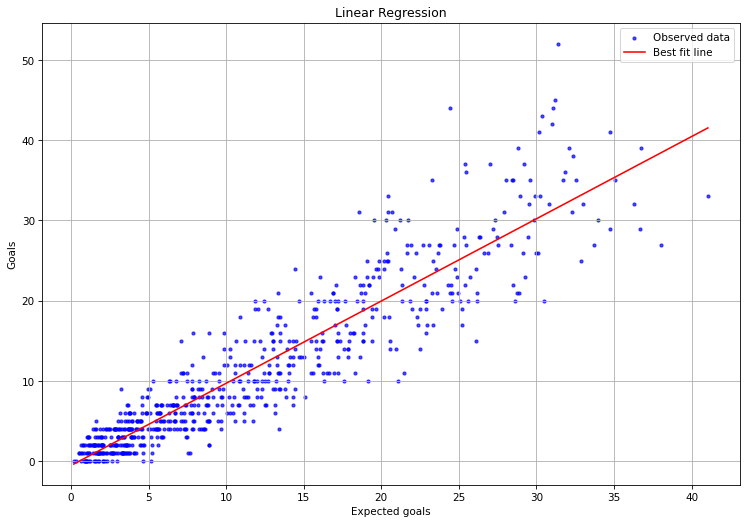

In [31]:
regression_analysis.plot_linear_regression(df_goals, feature1, feature2, xlabel=label1, ylabel=label2)

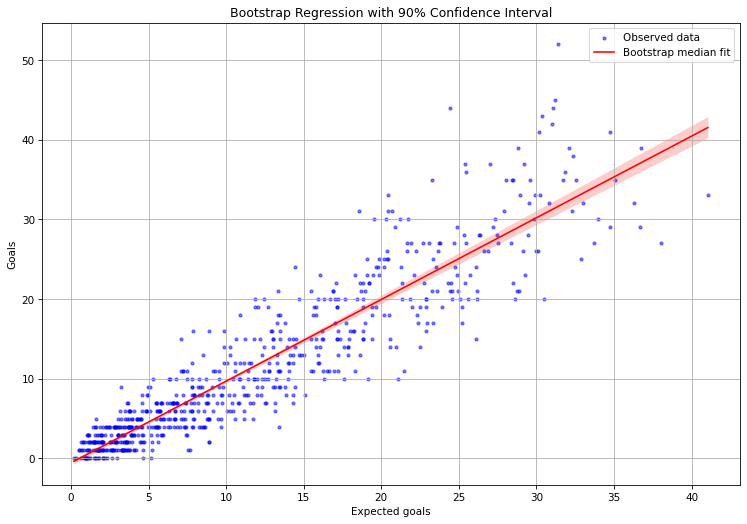

In [32]:
regression_analysis.plot_bootstrap_regression(df_goals, feature1, feature2, xlabel=label1, ylabel=label2)

## Part 03 - Relationships between multiple variables

In [40]:
situation = "all"
min_games_played = 20
target = "I_F_goals"
predictors = ["I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted", 
              "I_F_xGoalsFromxReboundsOfShots",
              "I_F_xRebounds"]
#predictors = ["I_F_xGoals", "I_F_shotsOnGoal"]

df_goals = df[(df["situation"]==situation) & (df["games_played"]>=min_games_played)]

In [41]:
regression_analysis.multiple_regression(df_goals, target, predictors)

                            OLS Regression Results                            
Dep. Variable:              I_F_goals   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1730.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):          1.43e-321
Time:                        22:42:52   Log-Likelihood:                -1848.2
No. Observations:                 698   AIC:                             3704.
Df Residuals:                     694   BIC:                             3723.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [37]:
import pandas as pd

# supponiamo che df sia il tuo DataFrame e 'target' la feature scelta
df_x = df_goals.drop(["playerId", "season", "name", "team", "position", "situation"], axis=1)
corr = df_x.corr()[[feature]].drop(feature)  # correlazione con target, escludo target stessa
top_features = corr[feature].abs().sort_values(ascending=False).head(10)  # top 10 correlate
print(top_features)

I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted    0.938290
I_F_xGoals_with_earned_rebounds_scoreAdjusted          0.937988
I_F_xGoals_with_earned_rebounds                        0.937481
I_F_flurryScoreVenueAdjustedxGoals                     0.923689
I_F_flurryAdjustedxGoals                               0.923259
I_F_scoreVenueAdjustedxGoals                           0.921541
I_F_xGoals                                             0.921057
I_F_xGoalsFromxReboundsOfShots                         0.906348
I_F_xRebounds                                          0.901023
I_F_points                                             0.891572
Name: I_F_goals, dtype: float64


/var/folders/br/b8vjjwyj0ns0x74hs0vkv78c0000gn/T/ipykernel_1871/947332825.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=values, y=top_features.index, palette=colors)
/var/folders/br/b8vjjwyj0ns0x74hs0vkv78c0000gn/T/ipykernel_1871/947332825.py:13: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  barplot = sns.barplot(x=values, y=top_features.index, palette=colors)


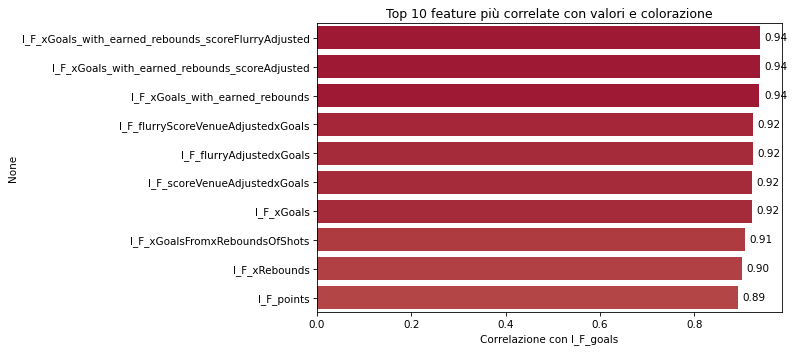

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))

values = top_features.values

colors = sns.color_palette("coolwarm", as_cmap=True)(np.abs(values) / np.max(np.abs(values)))

barplot = sns.barplot(x=values, y=top_features.index, palette=colors)

for i, v in enumerate(values):
    plt.text(v + 0.01 * np.sign(v), i, f"{v:.2f}", color='black', va='center')

plt.xlabel(f"Correlazione con {feature}")
plt.title("Top 10 feature più correlate con valori e colorazione")
plt.show()
